In [1]:
import numpy as np  
import matplotlib.pyplot as plt  
import matplotlib.font_manager  
import pandas as pd
from sklearn import svm  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, precision_recall_curve,confusion_matrix,classification_report
plt.style.use('seaborn')

In [2]:
d = pd.read_csv('C:/Users/jingy/Jupyter/Crime/Fight/CDI_Based/Entropy/CSV/Gray.csv',index_col=0)
d.Class[d['Class']==1] = -1
d.Class[d['Class'] == 0] = 1
display(d.head())

<ipython-input-2-5c402b8d9240>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.Class[d['Class']==1] = -1
<ipython-input-2-5c402b8d9240>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.Class[d['Class'] == 0] = 1


,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,Class
0,0.298890,0.243555,0.368200,0.141075,0.026745,0.024165,0.025299,0.013294,0.007776,0.005610,...,0.594919,0.571297,0.498230,0.651810,0.795108,0.513392,0.456466,0.563778,0.333603,1
1,1.154551,1.082385,1.195876,1.143801,0.853417,0.948769,1.165595,1.111884,1.151807,1.222546,...,0.903411,0.940838,1.018594,1.198660,0.956089,0.703548,0.800044,0.878147,0.780885,1
2,0.522846,0.577450,0.432822,0.562827,0.658966,0.246311,0.242812,0.226420,0.373526,0.528662,...,1.104311,0.713043,0.617966,0.746172,1.553118,0.988400,0.587547,0.428557,0.377591,1
3,0.845232,0.455117,0.393453,0.333030,0.395732,0.692572,0.407177,0.317000,0.253929,0.311912,...,0.399332,0.519333,0.127358,0.186973,0.247690,0.279265,0.789419,0.415539,0.330283,1
4,0.461526,0.787535,0.256154,0.170589,0.754727,0.368296,0.234785,0.771885,0.181732,0.186883,...,0.706019,0.289519,0.199781,0.711980,0.198858,0.141775,0.589598,0.233741,0.151662,1


In [3]:
data = d
mask = (data['Class'] == 1)

X_train, X_test = train_test_split(data[mask], test_size=0.2, random_state=2)
X_train = X_train.drop(['Class'], axis=1)
X_test = X_test.drop(['Class'], axis=1)
X_fraud = data[~mask].drop(['Class'], axis=1)

x_test=np.vstack((X_test,X_fraud))
y_test=[1]*len(X_test)+[-1]*len(X_fraud)

In [4]:
clf = svm.OneClassSVM(kernel='rbf',nu=0.7)  
clf.fit(X_train)  

y_pred = clf.predict(x_test)  
y_prob = clf.decision_function(x_test)  # the lower, the more normal

fpr,tpr,threshold_svc = metrics.roc_curve(y_test,y_prob)     
auc_svc = metrics.auc(fpr,tpr)   

precision, recall, _ = precision_recall_curve(y_test,y_prob)
pr_auc = auc(recall, precision)

score_svc = metrics.accuracy_score(y_test,y_pred)

print(score_svc)
print(classification_report(y_test, y_pred))

0.725
              precision    recall  f1-score   support

          -1       0.76      0.91      0.83        88
           1       0.47      0.22      0.30        32

    accuracy                           0.73       120
   macro avg       0.61      0.56      0.56       120
weighted avg       0.68      0.72      0.69       120



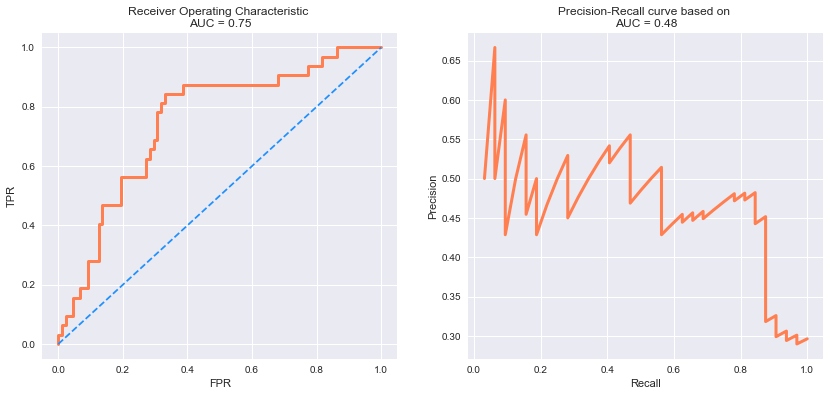

In [5]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
#plt.figure(figsize=(14, 6))
plt.title('Receiver Operating Characteristic \nAUC = %0.2f'% auc_svc)   
plt.plot(fpr, tpr, c='coral', lw=3)
plt.plot([0,1],[0,1], c='dodgerblue', ls='--')
plt.ylabel('TPR'); plt.xlabel('FPR')

plt.subplot(122)
plt.title('Precision-Recall curve based on \nAUC = %0.2f'% pr_auc)
plt.plot(recall[:-2], precision[:-2], c='coral', lw=3)
plt.xlabel('Recall'); plt.ylabel('Precision')
plt.show()